# Data Exploration
<p>
    This notebook should contain preliminary data exploration and graphing of the data set.
</p>
<p>
    Last modified 4/14/18 by Kate Baumli
</p>

In [28]:
! pip install gender-guesser
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import os

[nltk_data] Downloading package stopwords to /home/humble-
[nltk_data]     fool/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

First load up the data.

In [2]:
filepath = '../data/kaggle-data/'
filename = 'merged_data.csv'
data = pd.read_csv(filepath + filename)
# drop extra index column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
# Output suppressed
#data.describe()
#data.info()
data.head()

,Unnamed: 0.1,transcript,url,clean_transcripts,comments,description,duration,event,film_date,languages,...,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url.1,views,stripped_transcripts
0,0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,good morning\nhow are you\nlaughter\nits been ...,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,...,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,"['good', 'morning', 'how', 'are', 'you', 'laug..."
1,1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,"thank you so much, chris\nand its truly a grea...",265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,...,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"['thank', 'you', 'so', 'much,', 'chris', 'and'..."
2,2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,"music: the sound of silence, simon & garfunkel...",124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,...,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"['music:', 'the', 'sound', 'of', 'silence,', '..."
3,3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,if youre here today — and im very happy that y...,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,...,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,"['if', 'youre', 'here', 'today', '—', 'and', '..."
4,4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,"about 10 years ago, i took on the task to teac...",593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,...,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"['about', '10', 'years', 'ago,', 'i', 'took', ..."


In [4]:
# Output suppressed, this is to check data was cleaned properly
#print(data.clean_transcripts[0]) 

In [5]:
print('The number of NaN clean transcripts is:\t\t{}'.
      format(data.clean_transcripts.isnull().sum()))
print('The number of NaN original transcripts is:\t{}'.
      format(data.transcript.isnull().sum()))

The number of NaN clean transcripts is:		0
The number of NaN original transcripts is:	0


That is something we need to look into... For the moment I am going to drop them.

In [6]:
# Assuming the NaN are the same rows in both columns
data_trimmed = data.dropna(subset=['clean_transcripts'])

In [7]:
# Find transcript with the most words
maxLen = 0
for row in data_trimmed.itertuples():
    if len(row.clean_transcripts.split()) >= maxLen:
        maxLen = len(row.clean_transcripts.split()) 
        longestTalk = row.name
print(maxLen)
print(longestTalk)

9176
Zeynep Tufekci: Machine intelligence makes human morals more important


In [8]:
def getWords(df,removeStopWords):
    words = []
    for row in df.itertuples():
        words.extend(row.clean_transcripts.split())
    print('Total number of words: ',len(words))
    
    # Removing Stopwords ('the', 'it', 'is', 'and', etc)
    if removeStopWords:
        stopWords = set(stopwords.words('english'))
        print("Removing the stop words... ")
        
        filteredWords =[]
        for word in words: 
            if word not in stopWords:
                filteredWords.append(word)
                
        print('Total number of words excluding stop words: ',len(filteredWords))
        return filteredWords
    
    return words

In [9]:
def mostFrequentWords(df, numWordsDesired, descriptor='', removeStopWords=True, normalize=False):
    # This loops over all rows in the clean transcripts column and 
    # puts every word in every transcript into a list called words
    words = getWords(df,removeStopWords)
    
    descriptor2=''
    if removeStopWords:
        descriptor2 = '(excluding stop words like \'the\')'
    
    # Get counts for each word
    wordCounts = Counter(words)
    print(descriptor,'Number of unique words:',descriptor2,len(wordCounts))

    # Grab the most common words
    mostCommon = dict()
    for word, wordCount in wordCounts.most_common(numWordsDesired):
        if normalize:
            # Divide by total # of words to get percentage of words said
            mostCommon[word] = wordCount/float(len(words)) 
        else:
            mostCommon[word] = wordCount
    # Plot a histogram
    _ = plt.figure(figsize=(20,10))
    _ = sns.barplot(list(mostCommon.keys()), list(mostCommon.values()))
    title = ('The '+str(numWordsDesired)+' Most Common Words ' + descriptor2 +
             ' In All ' + descriptor +' TED Talk Transcripts')
    _ = plt.title(title)
    _ = plt.xticks(rotation=300)
    plt.show()
    
    # Return list of most common words
    return mostCommon

Total number of words:  5097705
Removing the stop words... 
Total number of words excluding stop words:  2564395
 Number of unique words: (excluding stop words like 'the') 102908


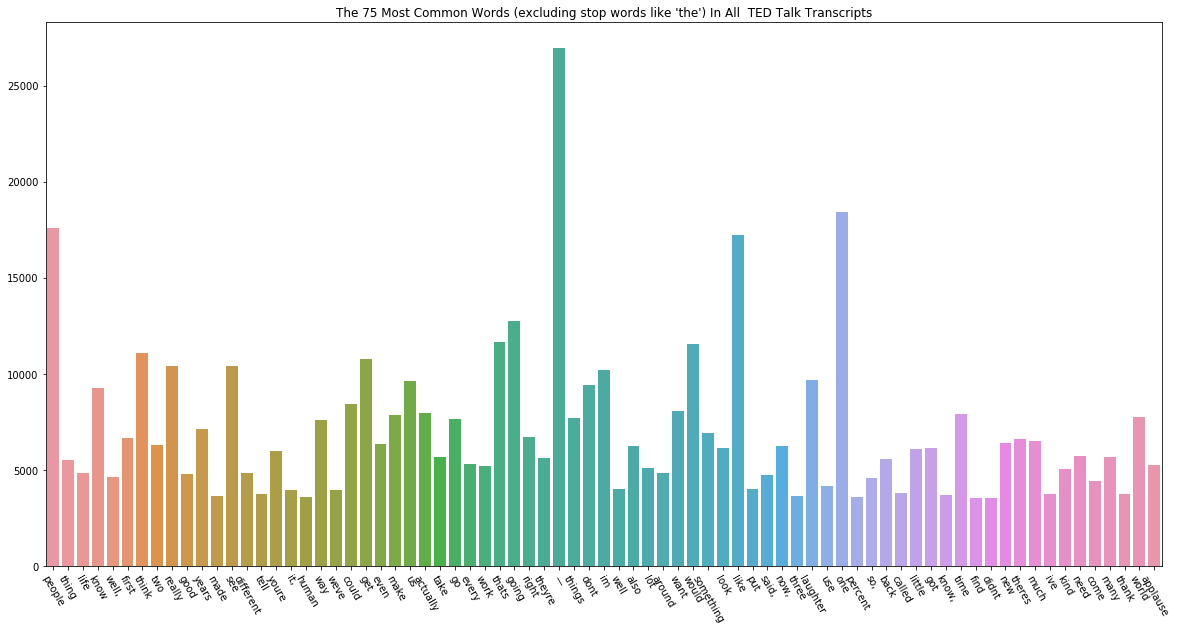

In [10]:
_ = mostFrequentWords(data_trimmed,75)

### Let's break the data set into two segments based on (guessed) speaker gender

In [11]:
genDetector = gender.Detector()
speakerNames = data_trimmed.main_speaker.tolist()

speakerFirstNames = []
genders = []
for name in speakerNames:
    firstLastName = name.split(' ')
    firstName = firstLastName[0]
    speakerFirstNames.append(firstName)
    genders.append(genDetector.get_gender(firstName))
data_trimmed['gender'] = genders


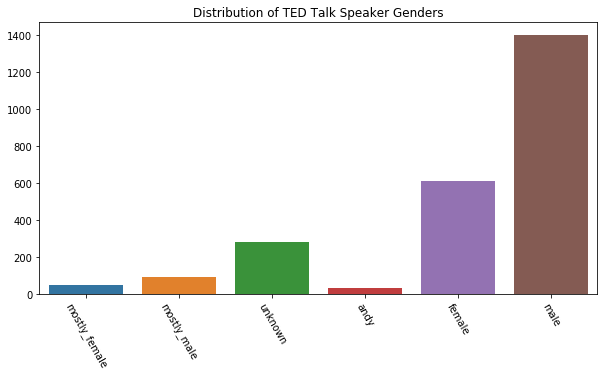

In [12]:
# Plot a histogram of genders
genderCounts = Counter(genders)
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(list(genderCounts.keys()), list(genderCounts.values()))
title = 'Distribution of TED Talk Speaker Genders'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
plt.show()

I'm going to go ahead and add the "mostly_female" names to female category and "mostly_male" names to male category. Unsure what to do about androgynous/unknown categories. We might have to go through and manually label these.<p>
Also, since classes are skewed we should normalize features when comparing.

In [13]:
for i,gender in enumerate(genders):
    if gender == 'mostly_male':
        genders[i] = 'male'
    if gender == 'mostly_female':
        genders[i] = 'female'
    if gender == 'andy':
        genders[i] = 'unknown' # No need to have 2 unknown categories if we're going to have to manually label anyways

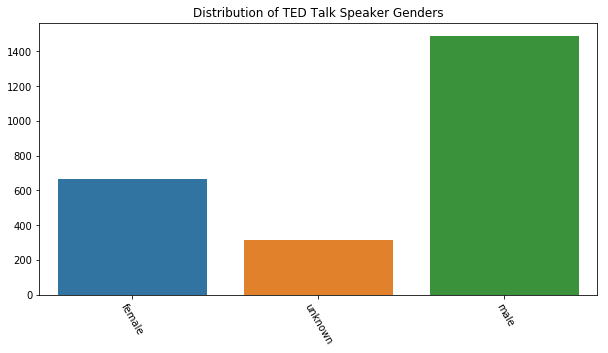

In [14]:
data_trimmed['gender'] = genders
# Replot a histogram of genders
genderCounts = Counter(genders)
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(list(genderCounts.keys()), list(genderCounts.values()))
title = 'Distribution of TED Talk Speaker Genders'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
plt.show()

Right off the bat we can see that about twice as many speakers are men than women(disregarding the unknown). Let's compare the average # of views of men vs women.

In [15]:
menTED = data_trimmed[data_trimmed['gender'] == 'male']
womenTED = data_trimmed[data_trimmed['gender'] == 'female']
print('Description of male speaker TED data:')
menTED.describe()
print('Description of female speaker TED data:')
womenTED.describe()

Description of male speaker TED data:


,Unnamed: 0.1,comments,duration,film_date,languages,num_speaker,published_date,views
count,1490.000000,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1.490000e+03,1.490000e+03
mean,1139.281208,205.567114,860.734228,1.300597e+09,27.838926,1.024161,1.326112e+09,1.723878e+06
std,697.949177,306.483377,402.323638,1.232214e+08,9.079876,0.166201,8.987412e+07,2.496100e+06
min,0.000000,9.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,6.666800e+04
25%,526.250000,70.000000,600.250000,1.248134e+09,23.000000,1.000000,1.254403e+09,7.441788e+05
50%,1124.000000,128.000000,894.000000,1.316822e+09,28.000000,1.000000,1.327637e+09,1.140840e+06
75%,1719.750000,238.000000,1074.000000,1.383091e+09,33.000000,1.000000,1.397121e+09,1.777379e+06
max,2466.000000,6404.000000,5256.000000,1.493078e+09,72.000000,3.000000,1.496418e+09,4.722711e+07


Description of female speaker TED data:


,Unnamed: 0.1,comments,duration,film_date,languages,num_speaker,published_date,views
count,664.000000,664.000000,664.000000,6.640000e+02,664.000000,664.000000,6.640000e+02,6.640000e+02
mean,1395.486446,189.010542,791.581325,1.343340e+09,28.349398,1.031627,1.359278e+09,1.749397e+06
std,707.159476,252.062087,312.940237,1.040754e+08,8.280248,0.252695,9.042287e+07,2.692399e+06
min,6.000000,6.000000,140.000000,8.863776e+08,0.000000,1.000000,1.152490e+09,1.211860e+05
25%,828.750000,64.000000,577.750000,1.284444e+09,24.000000,1.000000,1.292349e+09,8.142825e+05
50%,1453.000000,120.000000,794.000000,1.355530e+09,28.000000,1.000000,1.362929e+09,1.132388e+06
75%,2037.250000,208.250000,1008.750000,1.432426e+09,33.000000,1.000000,1.441141e+09,1.617353e+06
max,2465.000000,2877.000000,2853.000000,1.492992e+09,57.000000,4.000000,1.496401e+09,4.315540e+07


Let's compare the frequency of words:

Total number of words:  3124571
Removing the stop words... 
Total number of words excluding stop words:  1571601
Male Speaker Number of unique words: (excluding stop words like 'the') 80611


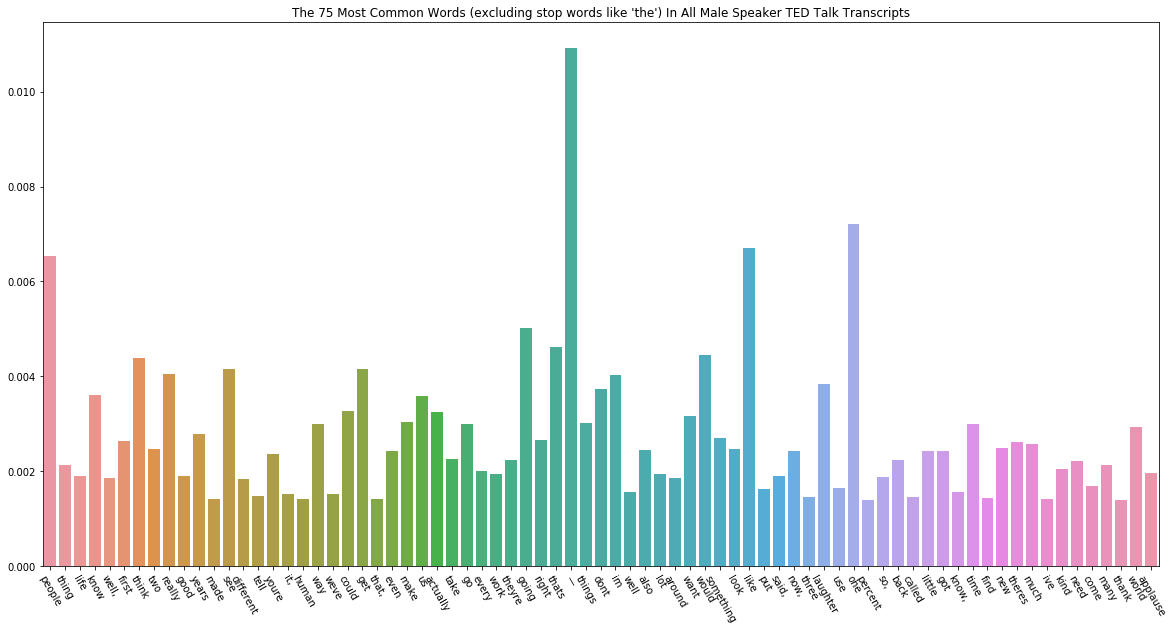

Total number of words:  1336634
Removing the stop words... 
Total number of words excluding stop words:  671475
Female Speaker Number of unique words: (excluding stop words like 'the') 50600


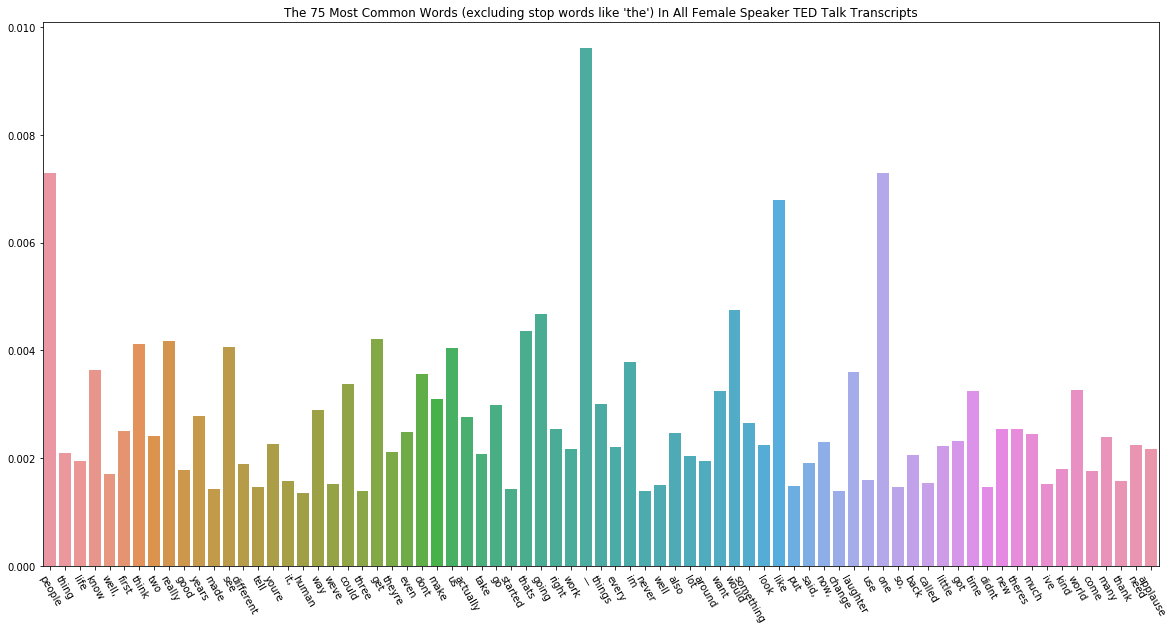

In [16]:
maleCommonWords = mostFrequentWords(menTED,75,'Male Speaker',normalize=True)
femaleCommonWords = mostFrequentWords(womenTED,75,'Female Speaker',normalize=True)

In [17]:
onlyMaleCommonWords = [word for word in maleCommonWords.keys() if word not in femaleCommonWords]
print(onlyMaleCommonWords) 
onlyFemaleCommonWords = [word for word in femaleCommonWords.keys() if word not in maleCommonWords]
print(onlyFemaleCommonWords)

['that,', 'percent', 'know,', 'find']
['started', 'never', 'change', 'didnt']


### Previous research on the differences of speech patterns between men and women, we have found that women are more likely to use speech qualifiers/intensifiers such as 'very','so','such','extremely','really','totally','absolutely', or 'too'. Let's look into that a little more here and compare our talks:

In [18]:
def menVsWomenWordCounts(wordsToCount):    
    maleWords = getWords(menTED,removeStopWords=False)
    femaleWords = getWords(womenTED,removeStopWords=False)

    # Get counts for each word
    maleWordCounts = Counter(maleWords)
    femaleWordCounts = Counter(femaleWords)

    # Normalize counts by number of total words spoken by men 
    normalizedMaleWordCounts = {}
    for word,count in dict(maleWordCounts).items():
        normalizedMaleWordCounts[word] = count/float(len(maleWords))

    # Normalize counts by number of total words spoken by women 
    normalizedFemaleWordCounts = {}
    for word,count in dict(femaleWordCounts).items():
        normalizedFemaleWordCounts[word] = count/float(len(femaleWords))

    maleCount = 0
    for word,count in normalizedMaleWordCounts.items():
        if word in wordsToCount:
            maleCount += count
        
    femaleCount = 0
    for word,count in normalizedFemaleWordCounts.items():
        if word in wordsToCount:
            femaleCount += count
            
    return maleCount, femaleCount

In [19]:
intensifiers = ['very','so','such','really','totally','too']
maleIntensifierCount, femaleIntensifierCount = menVsWomenWordCounts(intensifiers)

print('Percentage of intensifier words for men:',maleIntensifierCount)
print('Percentage of intensifier words for women:',femaleIntensifierCount)

Total number of words:  3124571
Total number of words:  1336634
Percentage of intensifier words for men: 0.012886569068201684
Percentage of intensifier words for women: 0.012901063417509955


Our data does not reflect the findings in these studies about intensifier words.
In fact, our male TED speakers actually tend to use these words more frequently than do the women. Some other studies https://www.washingtonpost.com/news/the-intersect/wp/2016/05/28/these-are-the-words-most-associated-with-men-and-women-according-to-facebook-status-updates/?noredirect=on&utm_term=.54981ab1318a have shown that women tend to use words that are more "warm and agreeable"

In [20]:
warmAndAgreeable = ['family','friends','wonderful','blessed','amazing','loving','husband','thankful']
maleWarmAgreeableCount, femaleWarmAgreeableCount = menVsWomenWordCounts(warmAndAgreeable)

print('Percentage of warm and agreeable words for men:  ',maleWarmAgreeableCount)
print('Percentage of warm and agreeable words for women:',femaleWarmAgreeableCount)

Total number of words:  3124571
Total number of words:  1336634
Percentage of warm and agreeable words for men:   0.0008449159900671165
Percentage of warm and agreeable words for women: 0.00105937751097159


In [21]:
coldHearted = ['kill','kills','dead','killing','die','swear','dead','murder']
maleColdHeartedCount, femaleColdHeartedCount = menVsWomenWordCounts(coldHearted)

print('Percentage of cold hearted words for men:  ',maleColdHeartedCount)
print('Percentage of cold hearted words for women:',femaleColdHeartedCount)

Total number of words:  3124571
Total number of words:  1336634
Percentage of cold hearted words for men:   0.00034372718686821323
Percentage of cold hearted words for women: 0.0004114813778491345


In [22]:
rational = ['opinion','opinions','logic','logical','based','political','fact','moral','beliefs']
maleRationalCount, femaleRationalCount = menVsWomenWordCounts(rational)
print('Percentage of rational words for men:  ',maleRationalCount)
print('Percentage of rational words for women:',femaleRationalCount)

Total number of words:  3124571
Total number of words:  1336634
Percentage of rational words for men:   0.0007620246107385623
Percentage of rational words for women: 0.0007773257301550014


Let's compare speed of speech of men and women. 

In [23]:
menTED.head()

,Unnamed: 0.1,transcript,url,clean_transcripts,comments,description,duration,event,film_date,languages,...,published_date,ratings,related_talks,speaker_occupation,tags,title,url.1,views,stripped_transcripts,gender
0,0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,good morning\nhow are you\nlaughter\nits been ...,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,...,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,"['good', 'morning', 'how', 'are', 'you', 'laug...",male
1,1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,"thank you so much, chris\nand its truly a grea...",265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,...,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"['thank', 'you', 'so', 'much,', 'chris', 'and'...",male
2,2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,"music: the sound of silence, simon & garfunkel...",124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,...,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"['music:', 'the', 'sound', 'of', 'silence,', '...",male
4,4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,"about 10 years ago, i took on the task to teac...",593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,...,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"['about', '10', 'years', 'ago,', 'i', 'took', ...",male
5,5,Thank you. I have to tell you I'm both challen...,https://www.ted.com/talks/tony_robbins_asks_wh...,thank you\ni have to tell you im both challeng...,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,...,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,"['thank', 'you', 'i', 'have', 'to', 'tell', 'y...",male


In [24]:
WPM = []
for row in data_trimmed.itertuples():
    minutes = row.duration/float(60) # Duration is in seconds
    numWords = len(row.clean_transcripts.split(' '))
    WPM.append(numWords/float(minutes))
data_trimmed['WPM'] = WPM

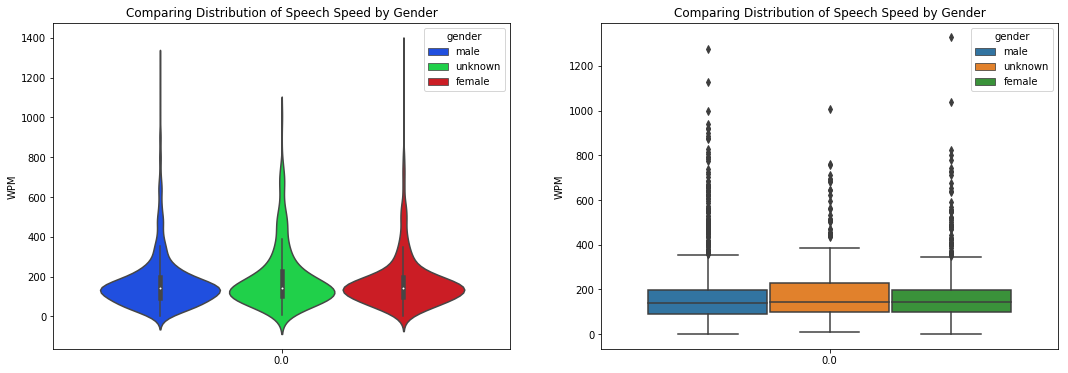

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
# violin plots in seaborn require 2 catagorical variables ('x' and 'hue'). We use 'gender' for hue.
placeholder = np.zeros(len(data_trimmed.WPM.values))
_ = sns.violinplot(x=placeholder, y=data_trimmed.WPM, hue=data_trimmed.gender, ax=axes[0], palette='bright')
_ = axes[0].set_title('Comparing Distribution of Speech Speed by Gender')
_ = sns.boxplot(x=placeholder,y=data_trimmed.WPM,hue=data_trimmed.gender, ax = axes[1])
_ = axes[1].set_title('Comparing Distribution of Speech Speed by Gender')
plt.show()

In [25]:
data_trimmed['gender'].value_counts()

male       1490
female      664
unknown     313
Name: gender, dtype: int64

12.68% of our data is categorized as unknown.

In [26]:
temp_df = data_trimmed[data_trimmed['gender'] == 'unknown']

In [35]:
filename = 'unknown_gender.csv'
filepath = os.getcwd() + "/../data/"
temp_df.to_csv(filepath+filename,encoding ='utf-8')